In [1]:
import pandas as pd
print(pd.__version__)

import numpy as np
print(np.__version__)

import matplotlib.pyplot as plt
import seaborn as sns

import pickle
import os

0.22.0
1.12.1


Pretty plotting.

In [2]:
# Use seaborn graphical settings, which are much prettier
sns.set()
# Scale widths, fonts, etc. to fit well in a paper (an alternative would be "notebook")
sns.set_context('notebook')
sns.set_style('whitegrid')

Load prices and market data.

In [3]:
data_dir = '/Users/johannes/OneDrive/Master Thesis - ML/03 - Programming/R/Data_Preparation/data_wide'
fpath = os.path.join(data_dir, 'merged_wide.csv')

df_prices = pd.read_csv(fpath, sep = ",", header = 0, index_col = 0, 
                        parse_dates = True, infer_datetime_format = True)

# Limit to price only: makes it a series
df_prices = df_prices['Win_VWP_Near']

print(df_prices.shape)
df_prices.iloc[0:5]

(53400,)


DeliveryTime
2011-11-02 01:00:00    35.975
2011-11-02 02:00:00    34.448
2011-11-02 03:00:00    35.313
2011-11-02 04:00:00    34.390
2011-11-02 05:00:00    37.055
Name: Win_VWP_Near, dtype: float64

Load prepared GRIB files.

In [4]:
grib_2011 = pickle.load(open('3_df/2011', 'rb'))
grib_2012 = pickle.load(open('3_df/2012', 'rb'))
grib_2013 = pickle.load(open('3_df/2013', 'rb'))
grib_2014 = pickle.load(open('3_df/2014', 'rb'))
grib_2015 = pickle.load(open('3_df/2015', 'rb'))
grib_2016 = pickle.load(open('3_df/2016', 'rb'))
grib_2017 = pickle.load(open('3_df/2017', 'rb'))

In [7]:
# Concatenate (verify_integrity to ensure there are no duplicate indices)
df_grib = pd.concat([grib_2011, grib_2012, grib_2013, grib_2014, grib_2015, grib_2016, grib_2017], verify_integrity = True)
print(df_grib.shape)

(54049, 15125)


In [10]:
# Read in complete timeline
tl = pd.read_csv('timeline_files.csv', index_col = 'DeliveryTime', parse_dates = True)
print(tl.shape)

(54049, 3)


In [11]:
# Reindex to make sure there are no gaps; also sorts the resulting DataFrame correctly
df_grib = df_grib.reindex(tl.index)
print('DeliveryTimes missing forecast: ', str(df_grib.shape[0] - df_grib.dropna().shape[0]))

DeliveryTimes missing forecast:  0


Load prepared GRIB weather forecasts where forecast bands were consistently structured.

In [13]:
df_grib.iloc[0:10, 0:5]

,0,1,2,3,4
DeliveryTime,,,,,
2011-11-02 00:00:00,275.711533,0.005912,-16.899307,-3.352432,3.865600e+04
2011-11-02 01:00:00,275.658524,0.007380,-16.889725,-3.819941,3.865600e+04
2011-11-02 02:00:00,275.605515,0.008848,-16.880142,-4.287450,3.865600e+04
2011-11-02 03:00:00,275.552505,0.010316,-16.870560,-4.754959,3.865600e+04
2011-11-02 04:00:00,275.593343,0.011428,-17.001556,-4.543218,3.865600e+04
2011-11-02 05:00:00,275.634181,0.012540,-17.132553,-4.331477,3.865600e+04
2011-11-02 06:00:00,275.675018,0.013651,-17.263550,-4.119736,3.865600e+04
2011-11-02 07:00:00,275.418304,0.007425,-16.261185,-4.474665,2.519999e-11
2011-11-02 08:00:00,275.501984,0.007746,-15.988235,-4.263036,2.879999e-11


Join the two together to map volume-weighted prices to weather forecasts for the corresponding DeliveryHour.

In [14]:
# Right-join to keep all prices so we can identify gaps (shouldn't be any since we re-indexed, but just to be safe)
df_grib = df_grib.join(df_prices, how = 'right')
del df_prices

In [15]:
print(df_grib.shape)
df_grib.head(5)

(53400, 15126)


,0,1,2,3,4,5,6,7,8,9,...,15116,15117,15118,15119,15120,15121,15122,15123,15124,Win_VWP_Near
DeliveryTime,,,,,,,,,,,,,,,,,,,,,
2011-11-02 01:00:00,275.658524,0.007380,-16.889725,-3.819941,38656.0,275.776606,0.007265,-17.025223,-3.580439,39808.0,...,0.000009,-0.307287,-0.148473,1249216.0,283.926183,0.000008,-0.504634,-0.582311,1.036992e+06,35.975
2011-11-02 02:00:00,275.605515,0.008848,-16.880142,-4.287450,38656.0,275.709600,0.008728,-16.969498,-4.026220,39808.0,...,0.000019,-0.153987,-1.144465,1249216.0,284.173793,0.000016,-0.243505,-1.461116,1.036992e+06,34.448
2011-11-02 03:00:00,275.552505,0.010316,-16.870560,-4.754959,38656.0,275.642593,0.010190,-16.913773,-4.472000,39808.0,...,0.000028,-0.000687,-2.140457,1249216.0,284.421402,0.000024,0.017624,-2.339920,1.036992e+06,35.313
2011-11-02 04:00:00,275.593343,0.011428,-17.001556,-4.543218,38656.0,275.672363,0.011374,-17.021983,-4.312831,39808.0,...,0.000089,-0.611176,-2.843836,1293952.0,284.611247,0.000106,-0.708018,-2.957850,1.096043e+06,34.390
2011-11-02 05:00:00,275.634181,0.012540,-17.132553,-4.331477,38656.0,275.702133,0.012557,-17.130193,-4.153661,39808.0,...,0.000149,-1.221664,-3.547216,1338688.0,284.801092,0.000188,-1.433660,-3.575780,1.155093e+06,37.055


In [18]:
# NaNs in complete timeline
print(df_grib.isnull().sum().sum())

0


In [19]:
train_size = 35880
valid_size = 8760
test_size = df_grib.shape[0] - train_size - valid_size
print(test_size)

8760


Now that the timeslines have been joined and gaps handled (i.e. we found none), split into input and output Numpy arrays.

In [20]:
prices = np.array(df_grib.iloc[:, -1])
print(prices.shape)
gribs = np.array(df_grib.iloc[:, :-1])
print(gribs.shape)
gribs = np.reshape(gribs, (-1, 55, 55, 5))
print(gribs.shape)

(53400,)
(53400, 15125)
(53400, 55, 55, 5)


Standardize the price data as usual.  
Min/Max-scale the forecast data per band.  
*As before, calculate the mean and standard deviations, minimums and maximums on the training set, then scale the whole set using those.*

In [21]:
p_mean = np.mean(prices[:train_size])
p_std = np.std(prices[:train_size])
print(p_mean)
print(p_std)

prices_stdzd = (prices - p_mean)/p_std
print(prices_stdzd.shape)

32.8342900502
13.071125727
(53400,)


In [22]:
#g_max = np.max(gribs, axis = (0, 1, 2), keepdims = True)
g_max = np.max(gribs[:train_size], axis = (0, 1, 2), keepdims = True)
print(g_max)
#g_min = np.min(gribs, axis = (0, 1, 2), keepdims = True)
g_min = np.min(gribs[:train_size], axis = (0, 1, 2), keepdims = True)
print(g_min)

gribs_scaled = (gribs - g_min)/(g_max - g_min)
print(gribs_scaled.shape)

# Clear memory (hopefully)
del gribs

[[[[  3.12413818e+02   1.02561951e-01   2.85811615e+01   2.88189087e+01
      2.79178260e+07]]]]
[[[[  2.36112467e+02   0.00000000e+00  -2.28485718e+01  -2.93605652e+01
      2.51999856e-11]]]]
(53400, 55, 55, 5)


In [23]:
# There are apparently some values outside this range in the validation and/or test sets
print(np.max(gribs_scaled, axis = (0, 1, 2), keepdims = True))
print(np.min(gribs_scaled, axis = (0, 1, 2), keepdims = True))

[[[[ 1.02089077  1.17114855  1.          1.          1.        ]]]]
[[[[-0.01502627  0.          0.          0.          0.        ]]]]


In [24]:
# Save the prepared datasets
pickle.dump(prices_stdzd[:train_size], open('grib_data/y_standardized_train', 'wb'), protocol = 4)
pickle.dump(prices_stdzd[train_size:-test_size], open('grib_data/y_standardized_valid', 'wb'), protocol = 4)
pickle.dump(prices_stdzd[-test_size:], open('grib_data/y_standardized_test', 'wb'), protocol = 4)

pickle.dump(gribs_scaled[:train_size], open('grib_data/x_scaled_train', 'wb'), protocol = 4)
pickle.dump(gribs_scaled[train_size:-test_size], open('grib_data/x_scaled_valid', 'wb'), protocol = 4)
pickle.dump(gribs_scaled[-test_size:], open('grib_data/x_scaled_test', 'wb'), protocol = 4)

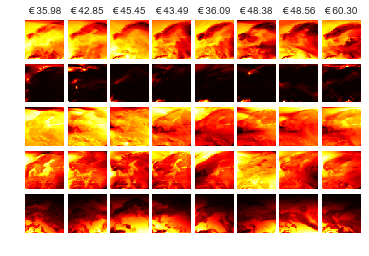

In [39]:
n = gribs_scaled[0:1000]
p = prices[0:1000]

hours = 8
i = 1
fig, ax = plt.subplots(5, hours)
fig.subplots_adjust(hspace=0.01, wspace=0.1)
for b in range(5):
    for h in range(hours):
        ax[b, h].imshow(n[h*30, ..., b], cmap = 'hot')
        ax[b, h].axis('off')
        if b == 0:
            ax[b, h].set_title('€ ' + str("{:.2f}".format(prices[h*30])), fontsize = 10)
        i = i + 1
fig.savefig('grid_prices.pdf', bbox_inces = 'tight')